---
format: 
  html:
    toc: true
execute:
  echo: true
---

# Spatial Processes and Correlations

#### Spatial Join: Census OSM and Meter locations

Upon hovering over areas of interest, the count of meters and associated variables, including wealth and demographic indicators, are observed. Preliminary findings suggest a correlation between areas with a high density of parking meters and indicators of affluence, such as higher socioeconomic status and a predominantly white population. Further analysis aims to uncover additional factors contributing to the observed patterns.

In [3]:
#| echo: true 
#| code-fold: true

# Import packages

import altair as alt
import geopandas as gpd
import pandas as pd
import numpy as np
import hvplot.pandas
import pandas as pd
from matplotlib import pyplot as plt
import holoviews as hv
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
import requests
import geoviews as gv
import geoviews.tile_sources as gvts
import folium
from folium import plugins
from shapely.geometry import Point
import xyzservices
import osmnx as ox
import networkx as nx
import pygris
import cenpy



%matplotlib inline

# See lots of columns
pd.options.display.max_rows = 9999 
pd.options.display.max_colwidth = 200

# Hide warnings due to issue in shapely package 
# See: https://github.com/shapely/shapely/issues/1345
np.seterr(invalid="ignore");


In [5]:
#| echo: true 
#| code-fold: true

# joining census and OSM data 

#columns_to_drop = ['in']

#sf_final.drop(columns=columns_to_drop, inplace=True)
sf_final = gpd.read_file("./data/census.geojson")
merged_gdf = gpd.read_file("./data/merged_gdf.geojson")

sf_final = sf_final.to_crs('EPSG:3857')

merged_gdf = merged_gdf.to_crs('EPSG:3857')

final_gdf = gpd.sjoin(merged_gdf, sf_final, how='left', op='intersects')

#columns_to_drop = ['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'GEOID', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'INTPTLAT', 'INTPTLON']

#final_gdf.drop(columns=columns_to_drop, inplace=True)


#final_gdf.head()

D:\Fall_2023\Python\Mambaforge\envs\musa-550-fall-2023\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [6]:
#| echo: true 
#| code-fold: true

#another map showing census data by street

final_gdf.explore(column="Count", tiles="cartodbdark_matter")

#### Correlations 

To understand distribution trends with more precision, a correlation test is conducted to identify the variables that exhibit the strongest statistical relationship with the count of parking meters. This information on influencing variables could inform predictive modeling for the future placement of parking meters. 

In [9]:
#| echo: true 
#| code-fold: true

# correlations

# The feature columns we want to use
import seaborn as sns


cols = [
    "Count",
    "truecount",
    "length",
 'Total_Pop', 
    'Med_Inc', 
    'White_Pop', 
    'Travel_Time', 
    'Means_of_Transport', 
    'Total_Public_Trans', 
    'Med_Age', 
    'workforce_16', 
    'Num_Vehicles', 
    'households_NOcar_pct', 
    'households_car_pct', 
    'commute_30_90min_pct', 
    'Drive_Work_pct', 
    'PublicTransport_work_pct', 
    'Percent_White', 
    'Mean_Commute_Time', 
    'Percent_Taking_Public_Trans'
]



# Trim to these columns and remove NaNs
final_corr = final_gdf[cols + ["geometry"]].dropna()
#final_corr.head()

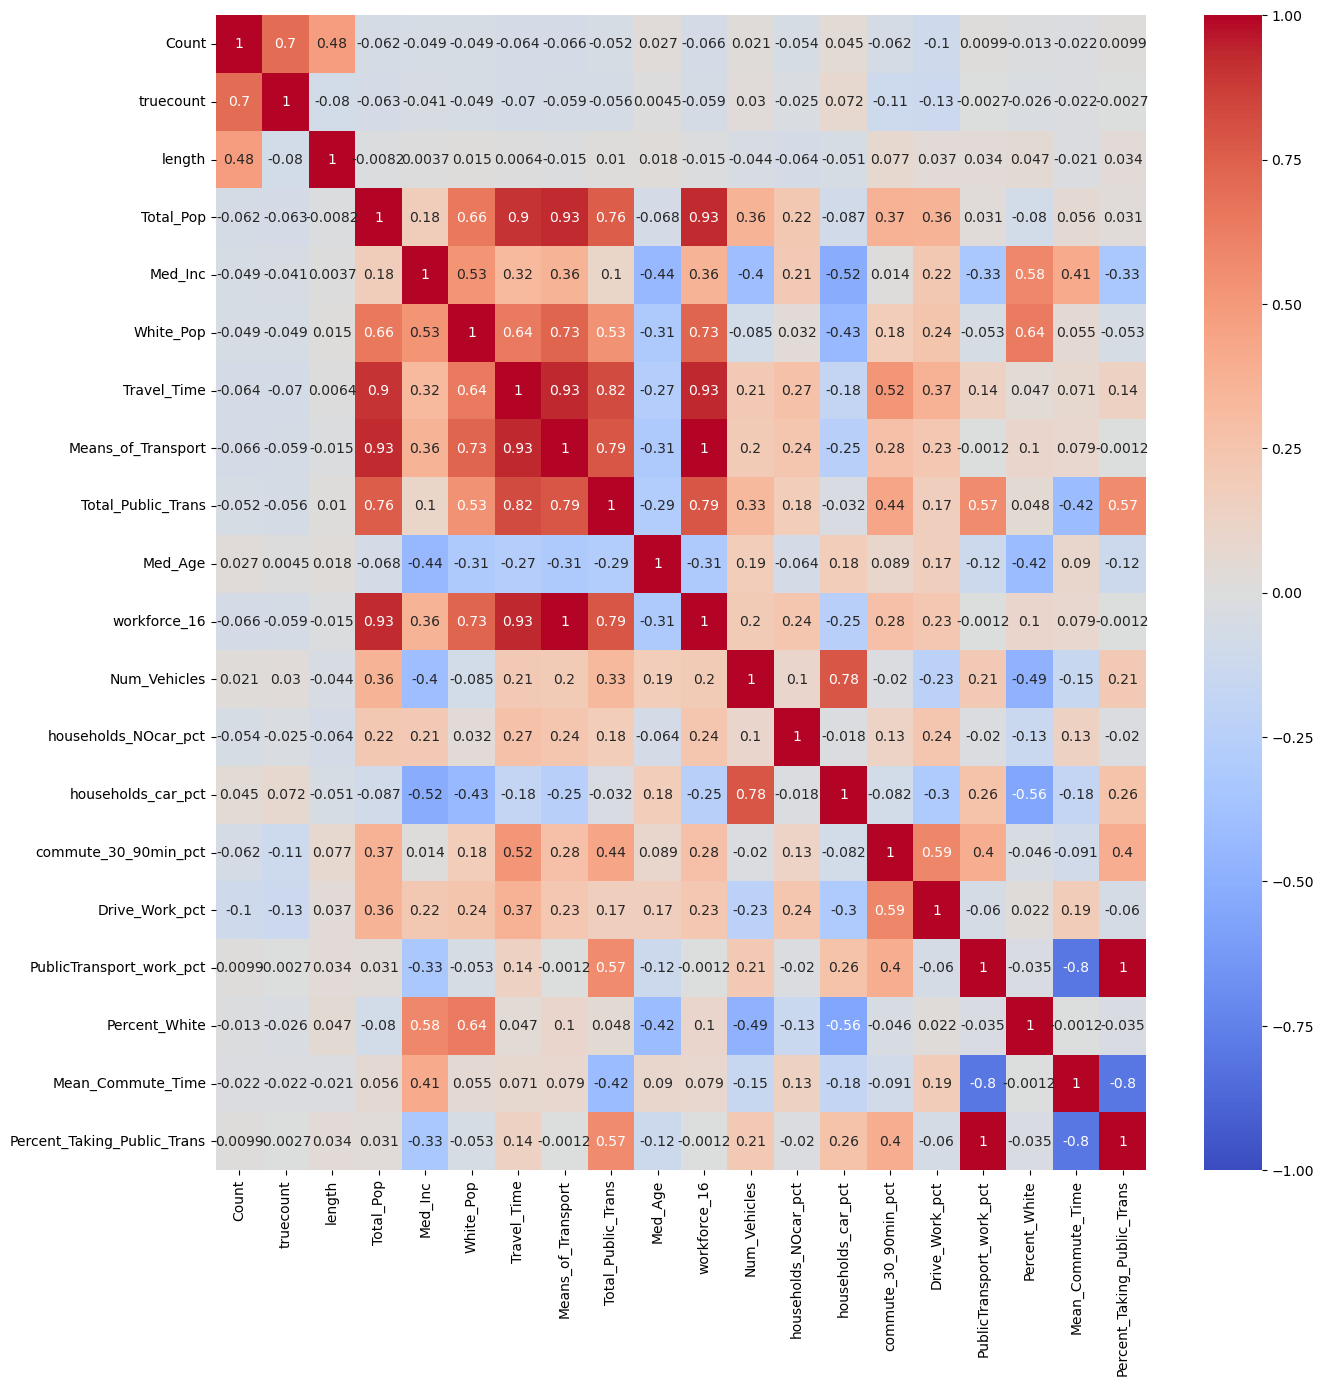

In [10]:
#| echo: true 
#| code-fold: true

plt.figure(figsize=(15, 15))
sns.heatmap(final_corr[cols].corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

plt.show()

We can see here that factors like percentage of people taking public transit and residents having longer commute times have a negative correlation with number of parking meters per street, indicating that an increase in these variables can be associated with meter-rich areas. 

### Conclusion and Next Steps

The patterns we have uncovered through this analysis not only sheds light on the current state of parking demand but also equips us with the predictive tools needed to anticipate future trends. Harnessing this knowledge can enable city officials and policymakers to proactively address the growing challenges of parking management, creating sustainable solutions that cater to the specific needs of different communities.